# cnn.py

In [14]:
# Larger CNN for the MNIST Dataset
import numpy
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt


In [22]:


K.set_image_data_format('channels_last')



seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape[0])
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))


60000
Epoch 1/10
300/300 [==============================] - 6s 19ms/step - loss: 0.3693 - accuracy: 0.8867 - val_loss: 0.0790 - val_accuracy: 0.9761
Epoch 2/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0941 - accuracy: 0.9707 - val_loss: 0.0588 - val_accuracy: 0.9824
Epoch 3/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 4/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 5/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0305 - val_accuracy: 0.9904
Epoch 6/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.0275 - val_accuracy: 0.9922
Epoch 7/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.0259 - val_accuracy: 

Prediction of model: [3.6966161e-09 2.2767721e-07 9.9999976e-01 2.7631879e-09 1.0011360e-10
 3.5505592e-11 1.2356303e-09 1.3235882e-10 3.3210534e-09 1.8047940e-11]
Test images shape: (4, 28, 28)
Predicted digit: [3.6966161e-09 2.2767721e-07 9.9999976e-01 2.7631879e-09 1.0011360e-10
 3.5505592e-11 1.2356303e-09 1.3235882e-10 3.3210534e-09 1.8047940e-11]
Predicted digit: [1.1056103e-05 9.9985218e-01 5.4735488e-06 2.5938835e-08 3.8198650e-05
 1.6880526e-06 6.2208260e-06 6.7119530e-05 9.4508350e-06 8.6676291e-06]
Predicted digit: [9.9991202e-01 1.0555127e-09 2.4535850e-06 9.2918299e-07 2.9663061e-09
 5.7172468e-07 7.4802287e-05 5.0176428e-08 5.6879098e-06 3.4545074e-06]
Predicted digit: [1.00651265e-10 3.85749654e-10 6.18913845e-08 1.08108966e-10
 9.99849558e-01 3.88095001e-10 9.51482804e-08 3.81601524e-08
 5.82121151e-09 1.50137552e-04]


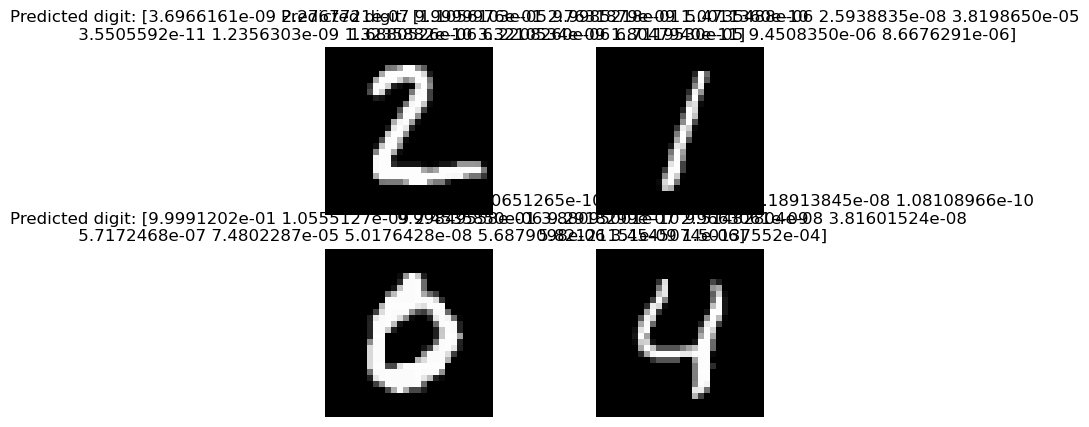

Saved model to disk


In [39]:

image = (X_test[1]).reshape(1,28,28,1) # 1->'2';    
model_pred = model.predict(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))
test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")
 

# sudoku.py

In [1]:
import cv2
import sys
from time import time
import matplotlib.pyplot as plt


# sudoku_extractor.py

In [2]:
import numpy as np
import cv2
import operator
from matplotlib import pyplot as plt


def plot_many_images(images, titles, rows=1, columns=2):
	"""Plots each image in a given list as a grid structure. using Matplotlib."""
	for i, image in enumerate(images):
		plt.subplot(rows, columns, i+1)
		plt.imshow(image, 'gray')
		plt.title(titles[i])
		plt.xticks([]), plt.yticks([]) 
	plt.show()


def show_image(img):
    """Shows an image until any key is pressed"""
    return img

def show_digits(digits, colour=255):
    """Shows list of 81 extracted digits in a grid format"""
    rows = []
    with_border = [cv2.copyMakeBorder(img.copy(), 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, colour) for img in digits]
    for i in range(9):
        row = np.concatenate(with_border[i * 9:((i + 1) * 9)], axis=1)
        rows.append(row)
    img = show_image(np.concatenate(rows))
    return img
 

def convert_when_colour(colour, img):
	"""Dynamically converts an image to colour if the input colour is a tuple and the image is grayscale."""
	if len(colour) == 3:
		if len(img.shape) == 2:
			img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
		elif img.shape[2] == 1:
			img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
	return img


def display_points(in_img, points, radius=5, colour=(0, 0, 255)):
	"""Draws circular points on an image."""
	img = in_img.copy()
	if len(colour) == 3:
		if len(img.shape) == 2:
			img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
		elif img.shape[2] == 1:
			img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

	for point in points:
		img = cv2.circle(img, tuple(int(x) for x in point), radius, colour, -1)
	show_image(img)
	return img


def display_rects(in_img, rects, colour=(0, 0, 255)):
	"""Displays rectangles on the image."""
	img = convert_when_colour(colour, in_img.copy())
	for rect in rects:
		img = cv2.rectangle(img, tuple(int(x) for x in rect[0]), tuple(int(x) for x in rect[1]), colour)
	show_image(img)
	return img


def display_contours(in_img, contours, colour=(0, 0, 255), thickness=2):
	"""Displays contours on the image."""
	img = convert_when_colour(colour, in_img.copy())
	img = cv2.drawContours(img, contours, -1, colour, thickness)
	show_image(img)


def pre_process_image(img, skip_dilate=False):
	"""Uses a blurring function, adaptive thresholding and dilation to expose the main features of an image."""
	proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)
	proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
	proc = cv2.bitwise_not(proc, proc)

	if not skip_dilate:
		kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
		proc = cv2.dilate(proc, kernel)

	return proc


def find_corners_of_largest_polygon(img):
	"""Finds the 4 extreme corners of the largest contour in the image."""
	opencv_version = cv2.__version__.split('.')[0]
	if opencv_version == '3':
		_, contours, h = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
	else:
		contours, h = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
	contours = sorted(contours, key=cv2.contourArea, reverse=True)  
	polygon = contours[0] 
	bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
	top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
	bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
	top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
	return [polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]]


def distance_between(p1, p2):
	"""Returns the scalar distance between two points"""
	a = p2[0] - p1[0]
	b = p2[1] - p1[1]
	return np.sqrt((a ** 2) + (b ** 2))


def crop_and_warp(img, crop_rect):
	"""Crops and warps a rectangular section from an image into a square of similar size."""
	top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]
	src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32')
	side = max([
		distance_between(bottom_right, top_right),
		distance_between(top_left, bottom_left),
		distance_between(bottom_right, bottom_left),
		distance_between(top_left, top_right)
	])

	dst = np.array([[0, 0], [side - 1, 0], [side - 1, side - 1], [0, side - 1]], dtype='float32')
	m = cv2.getPerspectiveTransform(src, dst)
	return cv2.warpPerspective(img, m, (int(side), int(side)))


def infer_grid(img):
	"""Infers 81 cell grid from a square image."""
	squares = []
	side = img.shape[:1]
	side = side[0] / 9
	for j in range(9):
		for i in range(9):
			p1 = (i * side, j * side) 
			p2 = ((i + 1) * side, (j + 1) * side) 
			squares.append((p1, p2))
	return squares


def cut_from_rect(img, rect):
	"""Cuts a rectangle from an image using the top left and bottom right points."""
	return img[int(rect[0][1]):int(rect[1][1]), int(rect[0][0]):int(rect[1][0])]


def scale_and_centre(img, size, margin=0, background=0):
	"""Scales and centres an image onto a new background square."""
	h, w = img.shape[:2]

	def centre_pad(length):
		"""Handles centering for a given length that may be odd or even."""
		if length % 2 == 0:
			side1 = int((size - length) / 2)
			side2 = side1
		else:
			side1 = int((size - length) / 2)
			side2 = side1 + 1
		return side1, side2

	def scale(r, x):
		return int(r * x)

	if h > w:
		t_pad = int(margin / 2)
		b_pad = t_pad
		ratio = (size - margin) / h
		w, h = scale(ratio, w), scale(ratio, h)
		l_pad, r_pad = centre_pad(w)
	else:
		l_pad = int(margin / 2)
		r_pad = l_pad
		ratio = (size - margin) / w
		w, h = scale(ratio, w), scale(ratio, h)
		t_pad, b_pad = centre_pad(h)

	img = cv2.resize(img, (w, h))
	img = cv2.copyMakeBorder(img, t_pad, b_pad, l_pad, r_pad, cv2.BORDER_CONSTANT, None, background)
	return cv2.resize(img, (size, size))


def find_largest_feature(inp_img, scan_tl=None, scan_br=None):
	"""
	Uses the fact the `floodFill` function returns a bounding box of the area it filled to find the biggest
	connected pixel structure in the image. Fills this structure in white, reducing the rest to black.
	"""
	img = inp_img.copy() 
	height, width = img.shape[:2]

	max_area = 0
	seed_point = (None, None)

	if scan_tl is None:
		scan_tl = [0, 0]

	if scan_br is None:
		scan_br = [width, height]

	for x in range(scan_tl[0], scan_br[0]):
		for y in range(scan_tl[1], scan_br[1]):
			if img.item(y, x) == 255 and x < width and y < height:  
				area = cv2.floodFill(img, None, (x, y), 64)
				if area[0] > max_area:  
					max_area = area[0]
					seed_point = (x, y)

	for x in range(width):
		for y in range(height):
			if img.item(y, x) == 255 and x < width and y < height:
				cv2.floodFill(img, None, (x, y), 64)

	mask = np.zeros((height + 2, width + 2), np.uint8)
	if all([p is not None for p in seed_point]):
		cv2.floodFill(img, mask, seed_point, 255)

	top, bottom, left, right = height, 0, width, 0

	for x in range(width):
		for y in range(height):
			if img.item(y, x) == 64:  
				cv2.floodFill(img, mask, (x, y), 0)
			if img.item(y, x) == 255:
				top = y if y < top else top
				bottom = y if y > bottom else bottom
				left = x if x < left else left
				right = x if x > right else right

	bbox = [[left, top], [right, bottom]]
	return img, np.array(bbox, dtype='float32'), seed_point


def extract_digit(img, rect, size):
	"""Extracts a digit (if one exists) from a Sudoku square."""

	digit = cut_from_rect(img, rect) 
	h, w = digit.shape[:2]
	margin = int(np.mean([h, w]) / 2.5)
	_, bbox, seed = find_largest_feature(digit, [margin, margin], [w - margin, h - margin])
	digit = cut_from_rect(digit, bbox)
	w = bbox[1][0] - bbox[0][0]
	h = bbox[1][1] - bbox[0][1]
	if w > 0 and h > 0 and (w * h) > 100 and len(digit) > 0:
		return scale_and_centre(digit, size, 4)
	else:
		return np.zeros((size, size), np.uint8)


def get_digits(img, squares, size):
    """Extracts digits from their cells and builds an array"""
    digits = []
    img = pre_process_image(img.copy(), skip_dilate=True)
    for square in squares:
        digits.append(extract_digit(img, square, size))
    return digits


def parse_grid(path):
    original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    processed = pre_process_image(original)
    corners = find_corners_of_largest_polygon(processed)
    cropped = crop_and_warp(original, corners)
    squares = infer_grid(cropped)
    digits = get_digits(cropped, squares, 28)
    final_image = show_digits(digits)
    return final_image

def extract_sudoku(image_path):
    final_image = parse_grid(image_path)
    return final_image



# Number Extractor

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import model_from_json
from keras import backend as K
K.set_image_data_format('channels_last')  

json_file = open('models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("models/model.h5")
print("Loaded saved model from disk.")
 
def identify_number(image):
    image_resize = cv2.resize(image, (28,28))    
    image_resize_2 = image_resize.reshape(1,28,28,1)    
    loaded_model_pred = loaded_model.predict(image_resize_2, verbose=0)
    loaded_model_pred_classes = np.argmax(loaded_model_pred, axis=1)
    return loaded_model_pred_classes[0]

def extract_number(sudoku):
    sudoku = cv2.resize(sudoku, (450,450))
    print(sudoku.shape)
    grid = np.zeros([9,9])
    for i in range(9):
        for j in range(9):
            image = sudoku[i*50:(i+1)*50,j*50:(j+1)*50]
            if image.sum() > 25000:
                grid[i][j] = identify_number(image)
            else:
                grid[i][j] = 0
    return grid.astype(int)

Loaded saved model from disk.


# solve sudoku

In [4]:
def print_grid(arr): 
	for i in range(9): 
		for j in range(9): 
			print (arr[i][j])
		print ('\n') 

def find_empty_location(arr,l): 
	for row in range(9): 
		for col in range(9): 
			if(arr[row][col]==0): 
				l[0]=row 
				l[1]=col 
				return True
	return False

def used_in_row(arr,row,num): 
	for i in range(9): 
		if(arr[row][i] == num): 
			return True
	return False

def used_in_col(arr,col,num): 
	for i in range(9): 
		if(arr[i][col] == num): 
			return True
	return False

def used_in_box(arr,row,col,num): 
	for i in range(3): 
		for j in range(3): 
			if(arr[i+row][j+col] == num): 
				return True
	return False


def check_location_is_safe(arr,row,col,num): 
	
	return not used_in_row(arr,row,num) and not used_in_col(arr,col,num) and not used_in_box(arr,row - row%3,col - col%3,num) 

def solve_sudoku(arr): 
	
	l=[0,0] 
	
	if(not find_empty_location(arr,l)): 
		return True
	
	row=l[0] 
	col=l[1] 
	
	for num in range(1,10): 
		if(check_location_is_safe(arr,row,col,num)):  
			arr[row][col]=num  
			if(solve_sudoku(arr)): 
				return True
			arr[row][col] = 0
					 
	return False

def sudoku_solver(grid):
	if(solve_sudoku(grid)):
		print('---') 
	else:
		print ("No solution exists")
	grid = grid.astype(int)
	return grid

In [ ]:
def output(a):
    sys.stdout.write(str(a))

def display_sudoku(sudoku):
    for i in range(9):
        for j in range(9):
            cell = sudoku[i][j]
            if cell == 0 or isinstance(cell, set):
                output('.')
            else:
                output(cell)
            if (j + 1) % 3 == 0 and j < 8:
                output(' |')

            if j != 8:
                output('  ')
        output('\n')
        if (i + 1) % 3 == 0 and i < 8:
            output("--------+----------+---------\n")

def show_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

def main(image_path):
    image = extract_sudoku(image_path)
    print("Hello ",image.shape)
    grid = extract_number(image)
    if grid is not None:
        print('Sudoku:')
        display_sudoku(grid.tolist())
        solution = sudoku_solver(grid)
    else:
        print("Failed to extract the Sudoku grid.")
    print('Sudoku:')
    display_sudoku(grid.tolist())
    solution = sudoku_solver(grid)
    print('Solution:')
    display_sudoku(solution.tolist())
        
def convert_sec_to_hms(seconds): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%08d" % (hour, minutes, seconds) 


start_time = time()
print(sys.argv[1])
main(image_path = '8f702d46-a3b0-44ff-bcf9-84024679e659.jpg')
print("TAT: ", round(time() - start_time, 3))